# TAKE HOME FINAL
Attempt to model a customer’s propensity to join our loyalty program

In [1]:
# Load in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv', index_col=0)
print(df.head())
print(df.shape)
print(df.isnull().sum())

   purch_amt  gender card_on_file   age  days_since_last_purch  loyalty
0      19.58    male           no  31.0                   35.0    False
1      65.16    male          yes  23.0                   61.0    False
2      40.60  female           no  36.0                   49.0    False
3      38.01    male          yes  47.0                   57.0    False
4      22.32  female          yes   5.0                   39.0    False
(120000, 6)
purch_amt                0
gender                   0
card_on_file             0
age                      0
days_since_last_purch    0
loyalty                  0
dtype: int64


In [3]:
# Change male to 1, female to 2
df['gender'] = np.where(df.gender=='male',0,1)

# Change card on file to binary
df['card_on_file'] = np.where(df.card_on_file=='no',0,1)

# Binarize loyalty
df['loyalty'] = np.where(df.loyalty==False,0,1)

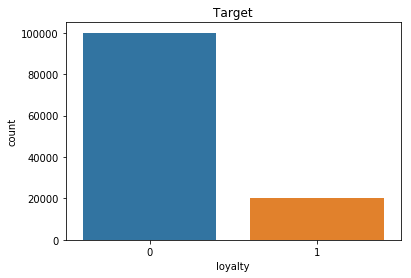

In [4]:
# Check out our target variable
sns.countplot(df.loyalty)
plt.title("Target")
plt.show()

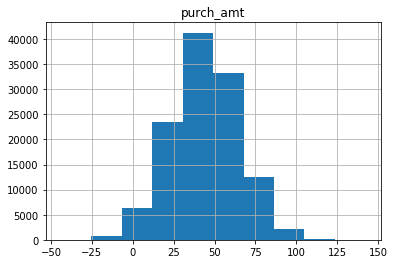

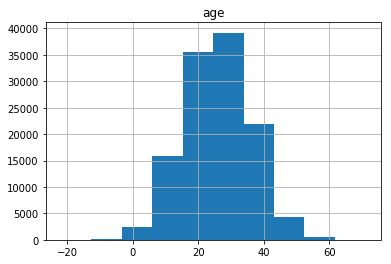

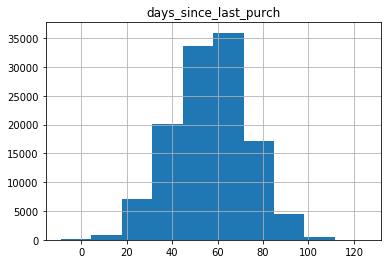

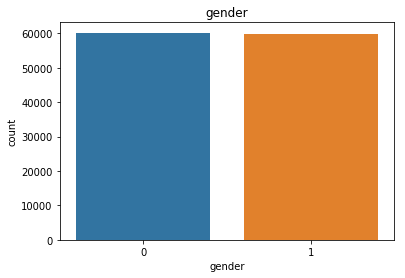

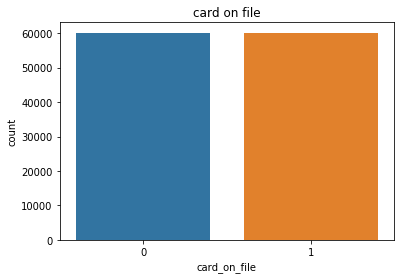

In [5]:
# Explore some features
cont_var = ['purch_amt', 'age', 'days_since_last_purch']

for col in cont_var:
    df[col].hist()
    plt.title(col)
    plt.show()
    
sns.countplot(df.gender)
plt.title('gender')
plt.show()

sns.countplot(df.card_on_file)
plt.title('card on file')
plt.show()

We have quite an imbalance between non-loyalty members and loyalty-members.  We will need to downsample our data to improve the models abililty to recognize the 'goods', in this case.  Since we are concerned with modeling a customers propensity to join the loyalty program, we are going to focus our criteria for model selections around the sensativity (true positive rate), specificity (true negative rate), and precision (positive predictive value).  We will also closely look at the confusion matrix to make sure we are choosing a model that also minimizes the type 2 error.

In [6]:
# Downsample
loyal = df[df.loyalty==1]
aint_loyal = df[df.loyalty==0].sample(len(loyal))

downsample_df = pd.concat([loyal, aint_loyal],0)
print(downsample_df.head())
print(downsample_df.shape)

    purch_amt  gender  card_on_file   age  days_since_last_purch  loyalty
9       93.63       1             0  40.0                   47.0        1
13      64.91       0             1  22.0                   59.0        1
23      11.55       0             0  21.0                   53.0        1
28      40.64       1             0  20.0                   29.0        1
35      64.07       0             0  10.0                   62.0        1
(40000, 6)


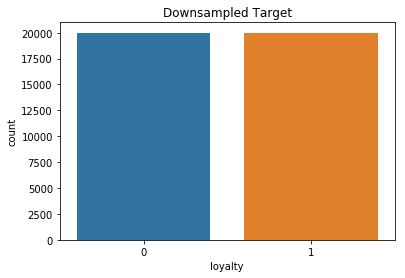

In [7]:
sns.countplot(downsample_df.loyalty)
plt.title("Downsampled Target")
plt.show()

In [22]:
# split data
xtrain, xtest, ytrain, ytest = train_test_split(downsample_df.drop('loyalty',1), 
                                                downsample_df.loyalty,
                                                test_size=0.2, 
                                                random_state=42)
def classifier(model):
    # Instantiate model
    clf = model
    
    # Fit model on training data
    clf.fit(xtrain,ytrain)
    
    # Predict test
    pred_test = clf.predict(xtest)
    
    # Confusion Matrix
    tn, fn, fp, tp = confusion_matrix(ytest, pred_test).ravel()
    print('Confusion matrix:\n',confusion_matrix(ytest, pred_test))
    
    # Classification report: precision and recall(sensativity)
    print('Classification Report:\n',classification_report(ytest, pred_test))
    
    # Specificity
    specificity1 = tn/(tn+fp)
    print('Specificity : ', specificity1)

    # TYPE error percentage    
    print('Percent type 1 error: {}'.format(fn/(tn+fp+fn+tp)))
    print('Percent type 2 error: {}'.format(fp/(tn+fp+fn+tp)))

In [23]:
classifier(LogisticRegression(C=1, solver='lbfgs'))

Confusion matrix:
 [[3098  888]
 [ 832 3182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      3986
           1       0.78      0.79      0.79      4014

   micro avg       0.79      0.79      0.79      8000
   macro avg       0.79      0.78      0.78      8000
weighted avg       0.79      0.79      0.78      8000

Specificity :  0.788295165394402
Percent type 1 error: 0.111
Percent type 2 error: 0.104


In [24]:
classifier(RandomForestClassifier())

Confusion matrix:
 [[3068  918]
 [1086 2928]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75      3986
           1       0.76      0.73      0.75      4014

   micro avg       0.75      0.75      0.75      8000
   macro avg       0.75      0.75      0.75      8000
weighted avg       0.75      0.75      0.75      8000

Specificity :  0.7385652383245065
Percent type 1 error: 0.11475
Percent type 2 error: 0.13575


In [25]:
classifier(DecisionTreeClassifier())

Confusion matrix:
 [[2814 1172]
 [1211 2803]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      3986
           1       0.71      0.70      0.70      4014

   micro avg       0.70      0.70      0.70      8000
   macro avg       0.70      0.70      0.70      8000
weighted avg       0.70      0.70      0.70      8000

Specificity :  0.6991304347826087
Percent type 1 error: 0.1465
Percent type 2 error: 0.151375


In [26]:
classifier(GradientBoostingClassifier())

Confusion matrix:
 [[3037  949]
 [ 796 3218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      3986
           1       0.77      0.80      0.79      4014

   micro avg       0.78      0.78      0.78      8000
   macro avg       0.78      0.78      0.78      8000
weighted avg       0.78      0.78      0.78      8000

Specificity :  0.7923297678058961
Percent type 1 error: 0.118625
Percent type 2 error: 0.0995


In [27]:
# Grid Search CV with GradientBoostingClassifier
t0=time.time()
gbc = GradientBoostingClassifier()
params = {'loss':['deviance', 'exponential'], 
          'learning_rate':[0.1, 0.01, 0.001],
          'subsample':[0.5, 0.75]}
clf = GridSearchCV(gbc, params, cv=5)
clf.fit(xtrain,ytrain)
print(clf.best_params_)
print('TIME: {:0.5}s'.format(time.time()-t0))

{'learning_rate': 0.1, 'loss': 'exponential', 'subsample': 0.5}
TIME: 64.153s


In [28]:
# Run Gradient Boosting Classifier on full dataset
gbc = GradientBoostingClassifier(learning_rate=0.1, loss='deviance', subsample=0.5)

X = df.drop('loyalty',1)
y = df.loyalty

# Fit
gbc.fit(xtrain,ytrain)

# Predict
pred = gbc.predict(X)

print('Confusion Matrix for full dataset:')
print(confusion_matrix(y,pred))

tn, fn, fp, tp = confusion_matrix(y, pred).ravel()
print('Percent type 2 error: {}'.format(fp/(tn+fp+fn+tp)))

Confusion Matrix for full dataset:
[[78179 21821]
 [ 3726 16274]]
Percent type 2 error: 0.03105
